In [ ]:
!curl https://colab.chainer.org/install | sh 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1580  100  1580    0     0  25079      0 --:--:-- --:--:-- --:--:-- 25079
+ apt -y -q install cuda-libraries-dev-10-0
Reading package lists...
Building dependency tree...
Reading state information...
cuda-libraries-dev-10-0 is already the newest version (10.0.130-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
+ pip install -q cupy-cuda100  chainer 
     |████████████████████████████████| 369.7MB 47kB/s 
+ set +ex
Installation succeeded!


In [ ]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)    

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [ ]:
file_id = '1ENgQm9TgabE1R99zhNf5q6meBvX6WFuq'
destination = './data.zip'
download_file_from_google_drive(file_id, destination)

In [ ]:
! git clone https://github.com/NVIDIA/FastPhotoStyle

Cloning into 'FastPhotoStyle'...
remote: Enumerating objects: 337, done.
remote: Total 337 (delta 0), reused 0 (delta 0), pack-reused 337
Receiving objects: 100% (337/337), 50.73 MiB | 42.00 MiB/s, done.
Resolving deltas: 100% (194/194), done.


In [ ]:
! unzip -qq data.zip -d FastPhotoStyle

In [ ]:
! mkdir -p FastPhotoStyle/images && rm -fr FastPhotoStyle/images/* && mkdir -p FastPhotoStyle/results && rm -fr FastPhotoStyle/results/*

In [ ]:
!sudo apt-get install -y axel imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fonts-arphic-ukai
  fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  axel fonts-droid-fallback fonts-noto-m

In [ ]:
! rm FastPhotoStyle/images/content1.png
! rm FastPhotoStyle/images/style1.png
! axel -n 1 https://storage.googleapis.com/swamphacks/trump1.jpg --output=FastPhotoStyle/images/content1.png  
! axel -n 1 https://storage.googleapis.com/hackybucket/template3.jpg --output=FastPhotoStyle/images/style1.png

Initializing download: https://storage.googleapis.com/swamphacks/trump1.jpg
File size: 762689 bytes
Opening output file FastPhotoStyle/images/content1.png
Starting download

[  0%]  .......... .......... .......... .......... ..........  [ 516.7KB/s]
[  6%]  .......... .......... .......... .......... ..........  [1000.8KB/s]
[ 13%]  .......... .......... .......... .......... ..........  [1488.8KB/s]
[ 20%]  .......... .......... .......... .......... ..........  [1955.7KB/s]
[ 26%]  .......... .......... .......... .......... ..........  [2429.2KB/s]
[ 33%]  .......... .......... .......... .......... ..........  [2891.0KB/s]
[ 40%]  .......... .......... .......... .......... ..........  [3358.3KB/s]
[ 46%]  .......... .......... .......... .......... ..........  [3811.6KB/s]
[ 53%]  .......... .......... .......... .......... ..........  [4272.4KB/s]
[ 60%]  .......... .......... .......... .......... ..........  [4715.9KB/s]
[ 67%]  .......... .......... .......... .......... ....

In [ ]:
! cd FastPhotoStyle/images && convert -resize 25% content1.png content1.png && convert -resize 50% style1.png style1.png

In [ ]:
!pip install pynvrtc

In [ ]:
!pip install -q scipy==1.0.0

In [ ]:
! cd FastPhotoStyle && python demo.py

Resize image: (958,647)->(958,647)
Resize image: (403,252)->(403,252)
Elapsed time in stylization: 0.499623
tcmalloc: large alloc 3707412480 bytes == 0x7fec81056000 @  0x7feeebf2a1e7 0x7fee394ff05a 0x7fee39525fd4 0x7fee395264d3 0x7fee3950d5e2 0x7fee39503189 0x7fee394fe283 0x50a4a5 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x50ad03 0x634e72 0x634f27 0x6386df 0x639281 0x4b0dc0
tcmalloc: large alloc 3707412480 bytes == 0x7feba40ac000 @  0x7feeebf2a1e7 0x7fee394ff05a 0x7fee39525fd4 0x7fee395264ea 0x7fee3950d5e2 0x7fee39503189 0x7fee394fe283 0x50a4a5 0x50cc96 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x507be4 0x50ad03 0x634e72 0x634f27 0x6386df 0x639281 0x4b0dc0
tcmalloc: large alloc 1853710336 bytes == 0x7feb358d6000 @  0x7feeebf2a1e7 0x7fee394ff05a 0x7fee39525fd4 0x7fee395265d3 0x7fee3950

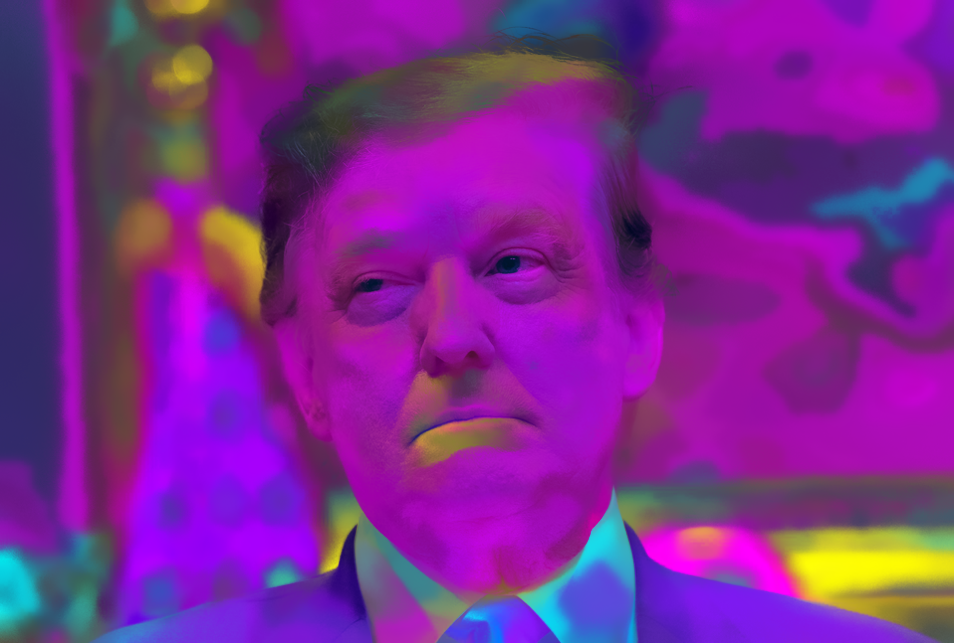

In [ ]:
from IPython.display import Image
Image("FastPhotoStyle/results/example1.png")

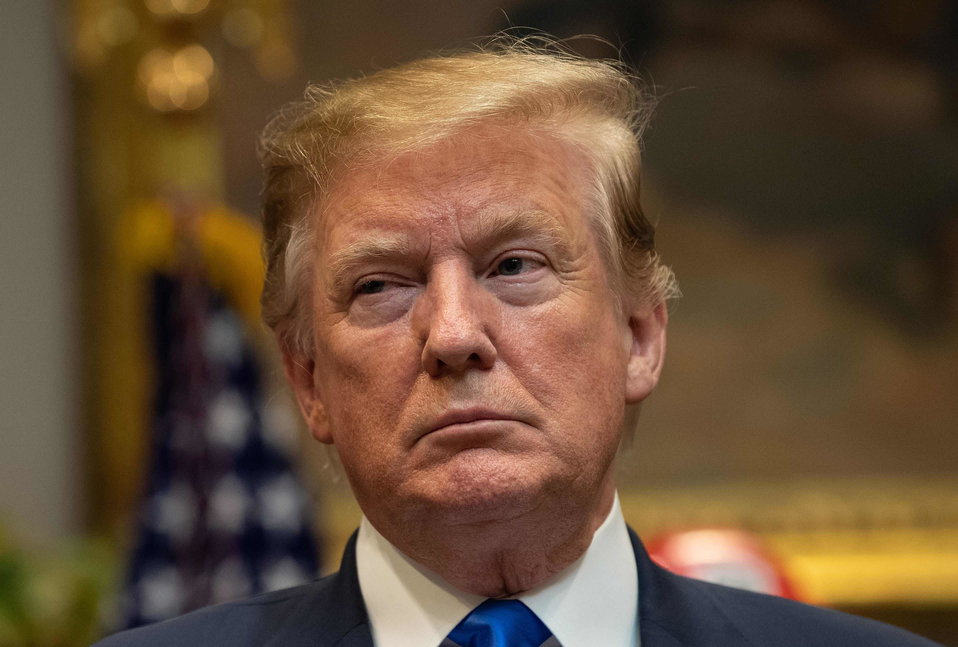

In [ ]:
Image('/content/FastPhotoStyle/images/content1.png')

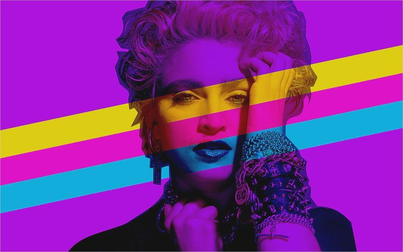

In [ ]:
Image('/content/FastPhotoStyle/images/style1.png')